In [ ]:
#type:ignore
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!pip install scipy numpy matplotlib

import requests
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [ ]:
l=[str(i) for i in range(1,5)]
l2=["T","E"]

In [ ]:
for i in l:
  for j in l2:
    file_url = f"https://bnci-horizon-2020.eu/database/data-sets/001-2014/A0{i}{j}.mat"
    file_path = f"A0{i}{j}.mat"

    print(file_url,"\n",file_path)
    response = requests.get(file_url)
    with open(file_path, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {file_path}")

    mat = scipy.io.loadmat(file_path)
    print("Keys in the .mat file:", mat.keys())

https://bnci-horizon-2020.eu/database/data-sets/001-2014/A01T.mat 
 A01T.mat
Downloaded A01T.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'data'])
https://bnci-horizon-2020.eu/database/data-sets/001-2014/A01E.mat 
 A01E.mat
Downloaded A01E.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'data'])
https://bnci-horizon-2020.eu/database/data-sets/001-2014/A02T.mat 
 A02T.mat
Downloaded A02T.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'data'])
https://bnci-horizon-2020.eu/database/data-sets/001-2014/A02E.mat 
 A02E.mat
Downloaded A02E.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'data'])
https://bnci-horizon-2020.eu/database/data-sets/001-2014/A03T.mat 
 A03T.mat
Downloaded A03T.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'data'])
https://bnci-horizon-2020.eu/database/data-sets/001-2014/A03E.mat 
 A03E.mat
Dow

In [ ]:
l=[str(i) for i in range(1,5)]
l2=["T","E"]

valid_data = []
valid_labels = []

for number in l:
  for char in l2:
    file_name=f"A0{number}{char}"
    mat=sio.loadmat(f'{file_name}.mat')

    eeg_data_struct = mat['data']
    tr=eeg_data_struct[0]

    for i, trial in enumerate(tr):
        y_field = trial[0]['y']
        x_field = trial[0]['X']

        if y_field.size > 0:
            valid_data.append(x_field)
            valid_labels.append(y_field)

valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)
print(f"Shape of valid data: {valid_data.shape}")
print(f"SHape for the valid trial: {valid_labels.shape}")

Shape of valid data: (70, 1)
SHape for the valid trial: (70, 1)


In [ ]:
print(valid_data)

[[array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
          -13.671875  , -43.9453125 ],
         [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
          -13.18359375, -40.52734375],
         [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
           -8.30078125, -38.57421875],
         ...,
         [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
          -40.52734375, -19.53125   ],
         [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
          -48.33984375, -12.6953125 ],
         [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
          -42.96875   ,  -9.27734375]])                               ]
 [array([[  2.05078125,   2.83203125,  -0.92773438, ...,  -6.8359375 ,
           15.625     ,  -8.7890625 ],
         [ -2.63671875,  -1.85546875,  -3.41796875, ...,  -8.7890625 ,
            1.46484375, -21.97265625],
         [ -9.765625  ,  -5.90820312,  -9.5703125 , ...,  -8.30078125,
  

In [ ]:
print(valid_labels)

[[array([], shape=(0, 1), dtype=uint8)]
 [array([], shape=(0, 1), dtype=uint8)]
 [array([], shape=(0, 1), dtype=uint8)]
 [array([[4],
         [3],
         [2],
         [1],
         [1],
         [2],
         [3],
         [4],
         [2],
         [3],
         [1],
         [1],
         [1],
         [4],
         [2],
         [2],
         [1],
         [1],
         [3],
         [1],
         [2],
         [4],
         [4],
         [3],
         [1],
         [4],
         [4],
         [2],
         [4],
         [4],
         [2],
         [1],
         [2],
         [3],
         [3],
         [3],
         [4],
         [3],
         [1],
         [4],
         [2],
         [3],
         [2],
         [3],
         [4],
         [2],
         [3],
         [1]], dtype=uint8)]
 [array([[1],
         [1],
         [4],
         [2],
         [1],
         [3],
         [1],
         [3],
         [2],
         [4],
         [1],
         [3],
         [3],
         [1

In [ ]:
valid_data[0]

array([array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
               -13.671875  , -43.9453125 ],
              [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
               -13.18359375, -40.52734375],
              [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
                -8.30078125, -38.57421875],
              ...,
              [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
               -40.52734375, -19.53125   ],
              [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
               -48.33984375, -12.6953125 ],
              [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
               -42.96875   ,  -9.27734375]])                               ],
      dtype=object)

In [ ]:
valid_labels[0]

array([array([], shape=(0, 1), dtype=uint8)], dtype=object)

In [ ]:
valid_labels[3]

array([array([[4],
              [3],
              [2],
              [1],
              [1],
              [2],
              [3],
              [4],
              [2],
              [3],
              [1],
              [1],
              [1],
              [4],
              [2],
              [2],
              [1],
              [1],
              [3],
              [1],
              [2],
              [4],
              [4],
              [3],
              [1],
              [4],
              [4],
              [2],
              [4],
              [4],
              [2],
              [1],
              [2],
              [3],
              [3],
              [3],
              [4],
              [3],
              [1],
              [4],
              [2],
              [3],
              [2],
              [3],
              [4],
              [2],
              [3],
              [1]], dtype=uint8)], dtype=object)

In [ ]:
len(valid_data), len(valid_labels)

(70, 70)

In [ ]:
len(valid_data[0]), len(valid_labels[0])

(1, 1)

In [ ]:
len(valid_data[0][0]), len(valid_labels[0][0])

(29683, 0)

In [ ]:
valid_data[3][0][0], valid_labels[3][0][0]

(array([  0.34179688,   0.24414062,  -3.22265625,  -7.86132812,
         -6.15234375,  -4.83398438,   0.9765625 ,  -6.34765625,
        -10.59570312, -11.96289062,  -8.93554688,  -7.08007812,
          0.14648438, -11.23046875, -12.01171875, -10.40039062,
        -10.30273438,  -7.12890625,  -8.54492188,  -7.51953125,
         -6.98242188,  -3.56445312,  10.25390625,  20.5078125 ,
          5.859375  ]),
 array([4], dtype=uint8))

In [ ]:
valid_data.shape, valid_data[0].shape, valid_data[0][0].shape

((70, 1), (1,), (29683, 25))

In [ ]:
len(valid_data), len(valid_data[0]), len(valid_data[0][0])

(70, 1, 29683)

In [ ]:
valid_labels.shape, valid_labels[0].shape, valid_labels[0][0].shape

((70, 1), (1,), (0, 1))

In [ ]:
len(valid_labels), len(valid_labels[0]), len(valid_labels[0][0])

(70, 1, 0)

In [ ]:
valid_labels[0][0]

array([], shape=(0, 1), dtype=uint8)

In [ ]:
filtered_data = []
filtered_labels = []
ct=0

for i in range(len(valid_labels)):
    if valid_labels[i][0].shape[0] != 0:
        filtered_data.append(valid_data[i])
        filtered_labels.append(valid_labels[i])
    else:
        ct+=1

filtered_data = np.array(filtered_data)
filtered_labels = np.array(filtered_labels)
print("Count : ", ct)

Count :  22


In [ ]:
print(filtered_data.shape, filtered_data[0].shape, filtered_data[0][0].shape)
print(len(filtered_data), len(filtered_data[0]), len(filtered_data[0][0]))

(48, 1) (1,) (96735, 25)
48 1 96735


In [ ]:
print(filtered_labels.shape, filtered_labels[0].shape, filtered_labels[0][0].shape)
print(len(filtered_labels), len(filtered_labels[0]), len(filtered_labels[0][0]))

(48, 1) (1,) (48, 1)
48 1 48


In [ ]:
filtered_data = np.array([trial[0] for trial in filtered_data])
filtered_labels = np.array([label[0] for label in filtered_labels])

In [ ]:
print(filtered_data.shape)
print(filtered_labels.shape)

(48, 96735, 25)
(48, 48, 1)


In [ ]:
aligned_data = []
aligned_labels = []

for i in range(len(filtered_data)):
    trial_data = filtered_data[i]
    trial_labels = filtered_labels[i].ravel()

    segment_length = trial_data.shape[0] // len(trial_labels)
    for j, label in enumerate(trial_labels):
        start_idx = j * segment_length
        end_idx = start_idx + segment_length
        aligned_data.append(trial_data[start_idx:end_idx])
        aligned_labels.append(label)

aligned_data = np.array(aligned_data)
aligned_labels = np.array(aligned_labels)

In [ ]:
print(aligned_data.shape)
print(aligned_labels.shape)

(2304, 2015, 25)
(2304,)


In [ ]:
x = aligned_data.reshape(aligned_data.shape[0], -1)
y = aligned_labels

In [ ]:
x.shape, y.shape

((2304, 50375), (2304,))

In [ ]:
np.unique(y)

array([1, 2, 3, 4], dtype=uint8)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1843, 50375) (1843,)
(461, 50375) (461,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# clf = SVC(kernel='linear', C=1)
# clf.fit(x_train, y_train,verbose=True)
# y_pred = clf.predict(x_test)
from tqdm import tqdm
import numpy as np

# Split data into smaller batches
batch_size = 100
num_batches = len(x_train) // batch_size

# Initialize model
clf = SVC(kernel='linear', C=1, verbose=False)

# Train in batches
for i in tqdm(range(num_batches), desc="Training Progress"):
    start = i * batch_size
    end = start + batch_size
    clf.fit(x_train[start:end], y_train[start:end])

Training Progress: 100%|██████████| 18/18 [00:13<00:00,  1.30it/s]


In [ ]:
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.23427331887201736
Confusion Matrix:
 [[22 34 34 21]
 [30 38 41 16]
 [35 18 38 17]
 [26 33 48 10]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.22559652928416485


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [ ]:
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

In [ ]:
# xgb_model.fit(x_train, y_train_adjusted)

In [ ]:
# y_pred_xgb = xgb_model.predict(x_test)

In [ ]:
# xgb_accuracy = accuracy_score(y_test_adjusted, y_pred_xgb)
# print("XGBoost Accuracy:", xgb_accuracy)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [ ]:
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=4)

In [ ]:
x_train.shape

(1843, 50375)

In [ ]:
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
x_train_reshaped.shape

(1843, 50375, 1)

In [ ]:
model = Sequential([
    LSTM(64, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train_reshaped, y_train_one_hot,
    validation_data=(x_test, y_test_one_hot),
    epochs=3, batch_size=16, verbose=1  # Reduce batch size
)


Epoch 1/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.2700 - loss: 1.3894 - val_accuracy: 0.2278 - val_loss: 1.3855
Epoch 2/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.2491 - loss: 1.3902 - val_accuracy: 0.2430 - val_loss: 1.3873
Epoch 3/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.2566 - loss: 1.3920 - val_accuracy: 0.2126 - val_loss: 1.3863


In [ ]:
model.save("LSTM_Model.h5")

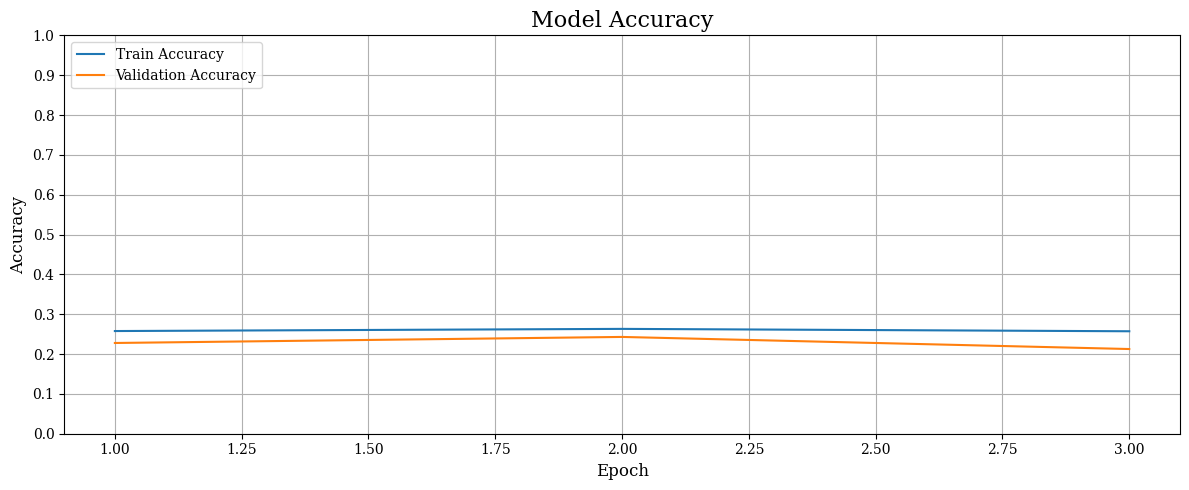

In [ ]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Accuracy', fontsize=16)

plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0, 1)
plt.yticks([i * 0.1 for i in range(11)])

plt.tight_layout()
plt.grid()
plt.show()

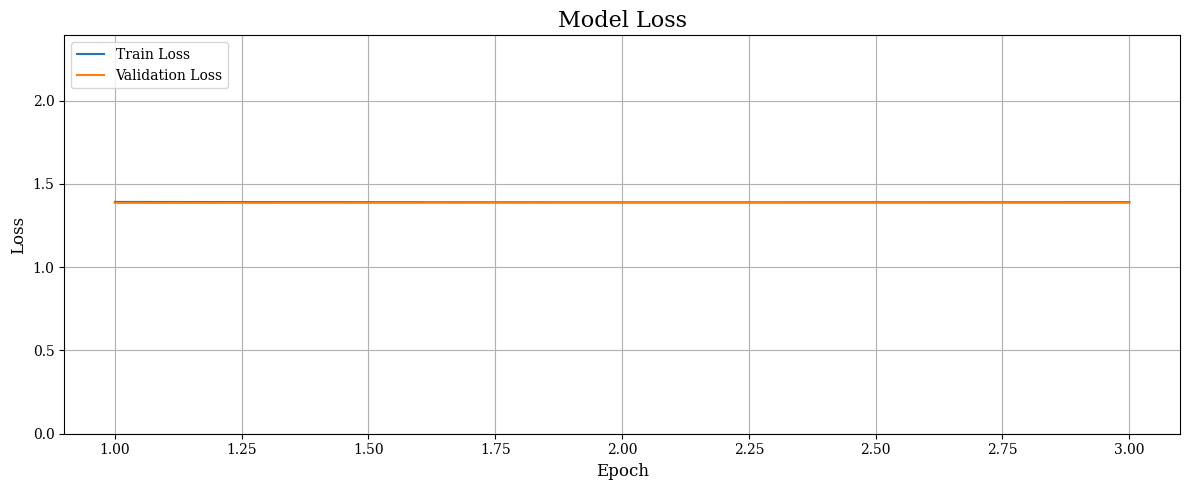

In [ ]:
plt.figure(figsize=(12, 5))

plt.rcParams['font.family'] = 'serif'
plt.title('Model Loss', fontsize=16)

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Train Loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')

plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper left')

plt.ylim(0,1 + max(max(history.history['loss']), max(history.history['val_loss'])))

plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
y_pred_prob = model.predict(x_test_reshaped)
y_pred = np.argmax(y_pred_prob, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


In [ ]:
lstm_accuracy = accuracy_score(y_test_adjusted, y_pred)
print("LSTM Accuracy:", lstm_accuracy)

LSTM Accuracy: 0.21258134490238612


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
conf_matrix = confusion_matrix(y_test_adjusted, y_pred)

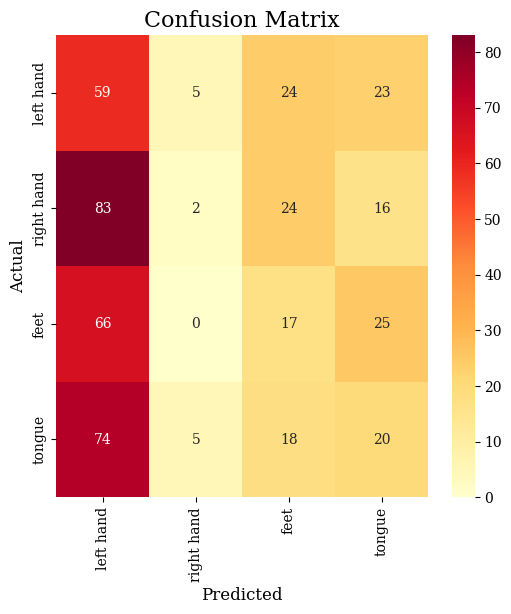

In [ ]:
plt.figure(figsize=(6, 6))

plot_labels=["left hand","right hand", "feet", "tongue"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrRd", xticklabels=plot_labels, yticklabels=plot_labels)

plt.xlabel('Predicted', fontsize=12, fontfamily='serif')
plt.ylabel('Actual', fontsize=12, fontfamily='serif')
plt.title('Confusion Matrix', fontsize=16, fontfamily='serif')

plt.xticks(fontsize=10, fontfamily='serif', rotation=90)
plt.yticks(fontsize=10, fontfamily='serif')

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 50373, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 25186, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 25186, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 25184, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 12592, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 12592, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1611776)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │     206,307,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,332,932 (787.10 MB)

 Trainable params: 206,332,932 (787.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_history=cnn_model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(x_test_reshaped, y_test))

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 593ms/step - accuracy: 0.2678 - loss: nan - val_accuracy: 0.2343 - val_loss: nan
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 54s 273ms/step - accuracy: 0.2525 - loss: nan - val_accuracy: 0.2343 - val_loss: nan
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 278ms/step - accuracy: 0.2623 - loss: nan - val_accuracy: 0.2343 - val_loss: nan
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.2433 - loss: nan - val_accuracy: 0.2343 - val_loss: nan
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - accuracy: 0.2572 - loss: nan - val_accuracy: 0.2343 - val_loss: nan
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - accuracy: 0.2518 - loss: nan - val_accuracy: 0.2343 - val_loss: nan
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - accuracy: 0.2300 - loss: nan - val_accuracy: 0.2343 - val_loss: nan
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.2607 - loss: nan - val_accuracy: 0.2343 - val_loss: nan
Epoch 9/10
58/58

In [ ]:
loss, accuracy = cnn_model.evaluate(x_test_reshaped, y_test)
print(f'Test accuracy: {accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2442 - loss: nan
Test accuracy: 0.23427331447601318
